In [138]:
from Model import Model
from brian2 import*
import functions
import paintapp
from IPython.display import Video, Image
from opencvtry import cvWriter
import parameter_tuning
import copy

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create, Run and Plot
Create the Model.
Run the model for 100 ms.
Plot the voltages of some cells.

## Create the trajectory
With a paint app, we draw the trajectory we want.
First we draw a trajectory by using the "paintapp.py".

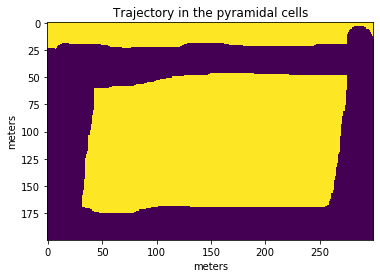

In [249]:
trajectory = paintapp.create_trajectory()

## Exploration of parameters
Explore parameters to find some appropriate one. 

In [250]:
params = {'trajectory' : trajectory,          
          'rec_weight' : 3.,
          'noise_weight' : 0.1,
          'R_weight' : 10.,
          'inh_weight_pi' : 0.1,
           'inh_weight_ip' : 0.01,
          'tau_dyn_inh' : 10 * ms
         }

    
list_params = [params]

In [260]:
params = {'trajectory' : trajectory,          
          'rec_weight' : 0.,
          'noise_weight' : 0.,
          'R_weight' : 0.,
          'inh_weight_pi' : 0.,
           'inh_weight_ip' : 0.0,
          'tau_dyn_inh' : 10 * ms,
          "P_input_rate" : 10 * Hz,
            "P_weight" : 0.5,
         }

    
list_params = [params]

WARNING    "v_leak_exc" is an internal variable of group "neurongroup_206", but also exists in the run namespace with the value -60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v_leak_inh" is an internal variable of group "neurongroup_207", but also exists in the run namespace with the value -10. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    "v_leak_random" is an internal variable of group "neurongroup_208", but also exists in the run namespace with the value -30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


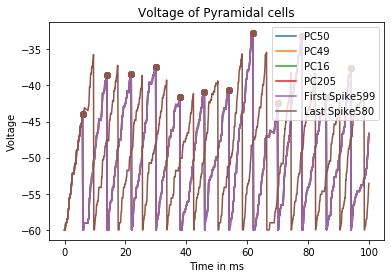

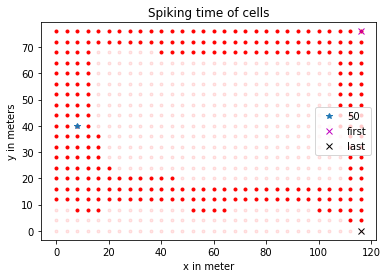

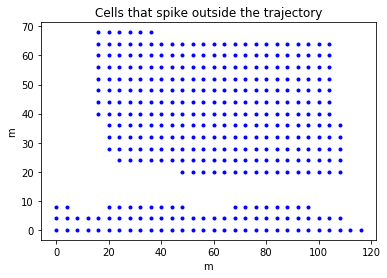

In [261]:
fm1 = functions.plot_run(params, 'ThresholdModel', record_=False)

## Plot the voltage of different cells

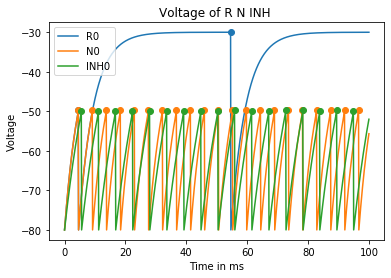

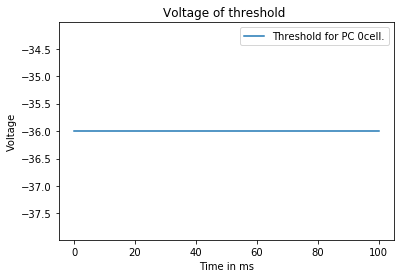

In [210]:
functions.plot_voltages_other_types(fm1)
functions.plot_voltages_other_types(fm1, ["threshold"])

## Video of spikes
Video of pyramidal cells and their spike times.

In [131]:
file_path_name, width_, height_ = functions.create_movie(fm1)
video = Video(file_path_name, width=width_, height=height_)
video

In [133]:
file_path_name, width_, height_ = functions.create_movie(fm1, spiking_index = None)
video = Video(file_path_name, width=width_, height=height_)
video

## Structure of the network
Plot the connectivity of the cells:
- Reccurrent connectivity
- INH inputs, inhibitory inputs
- N inputs, noise 2 higher in the trajectory
- R inputs, random to break synchronity

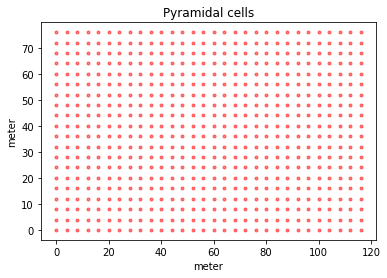

In [228]:
color = 'r'
for i in range(fm1.p['rows']*fm1.p['cols']):
    plot(fm1.PC.x[i] / meter, fm1.PC.y[i] / meter, color + '.', alpha = 0.5)
xlabel("meter")
ylabel("meter", rotation='vertical')
title("Pyramidal cells")
show()

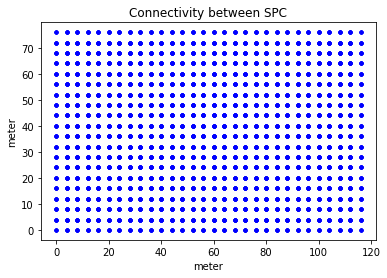

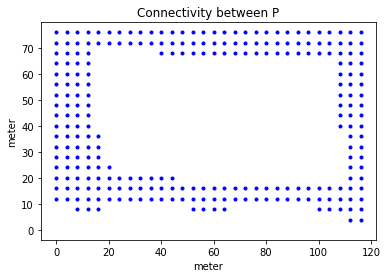

In [253]:
result = functions.plot_all_connectivity(fm1)


## Some tools


## Distribution of parameters
Plot distribtution of certain parameters:
- Weight parameters
- Delay parameters

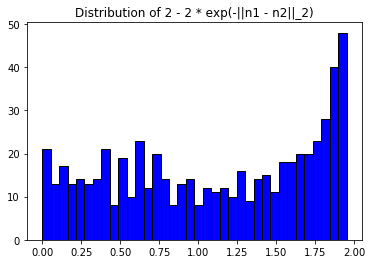

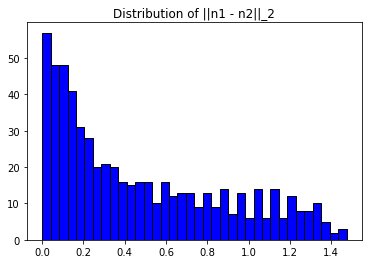

In [111]:
functions.plot_different_distances(fm1)

## Visualise distances
Norm l2 distance.

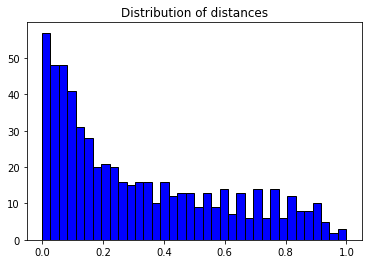

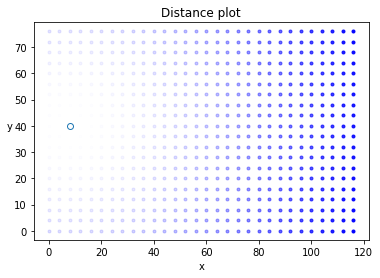

In [207]:
neuron_idx = 50
functions.plot_distance(fm1)

## Parameter exploration
Can explore the different parameters and their consequences.

In [206]:
n = 3
my_dict = {'rec_weight' : 2.5 ,
            'inh_weight_pi' : 0.1,
            }
step = [0.5, 0.1]

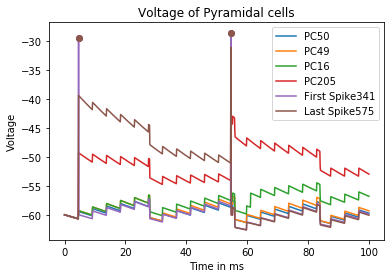

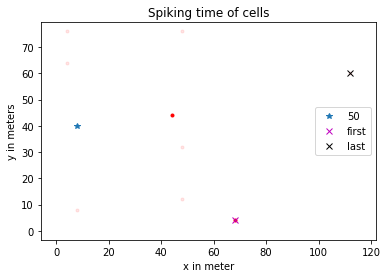

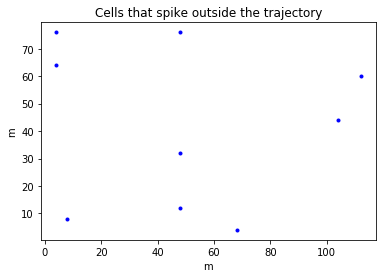

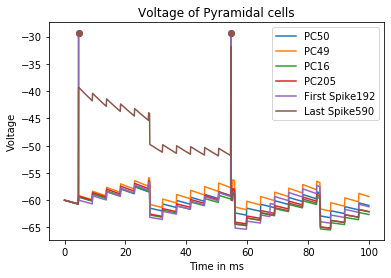

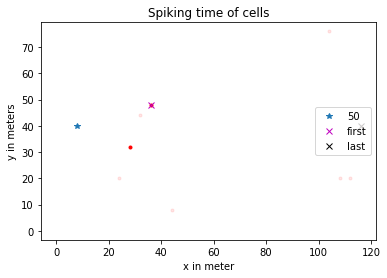

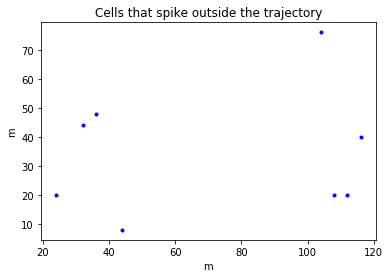

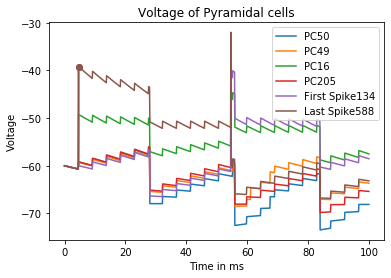

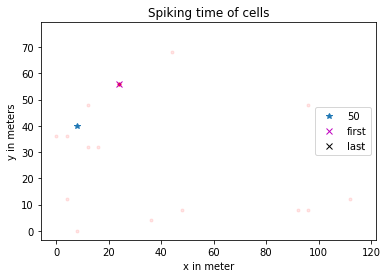

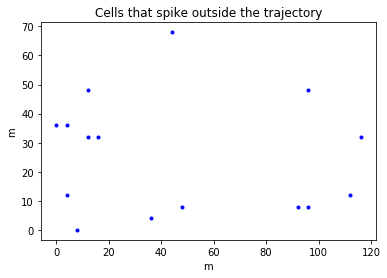

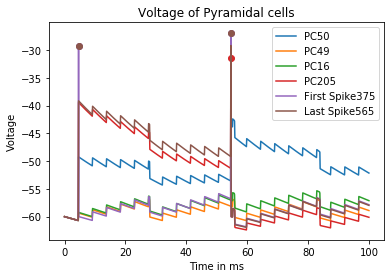

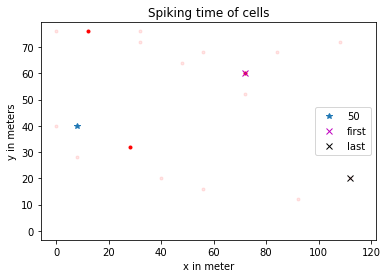

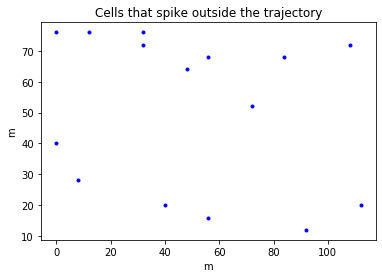

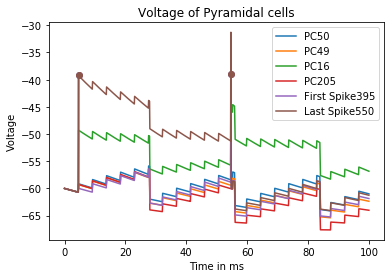

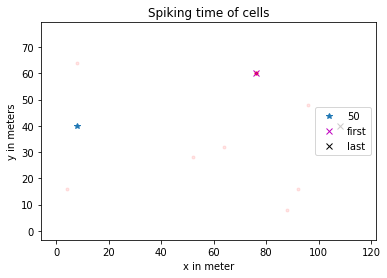

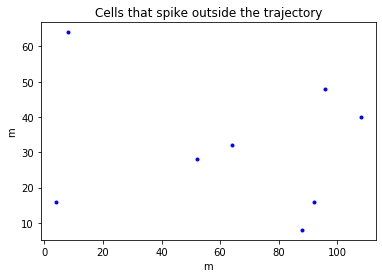

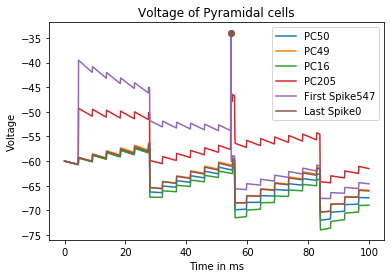

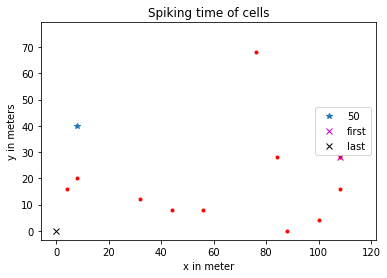

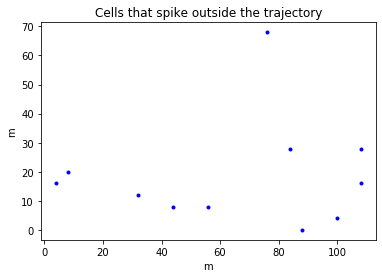

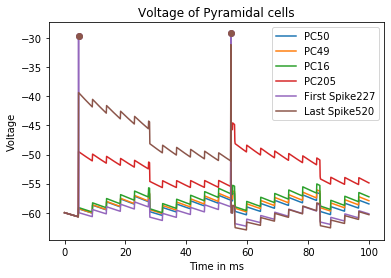

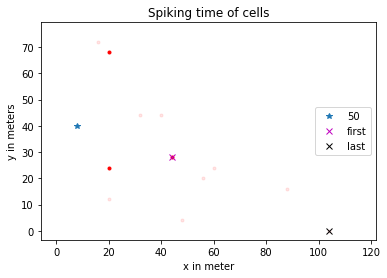

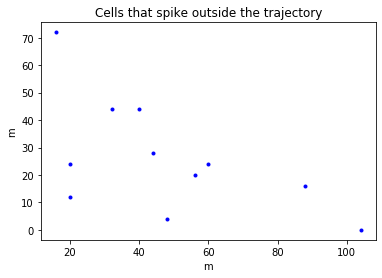

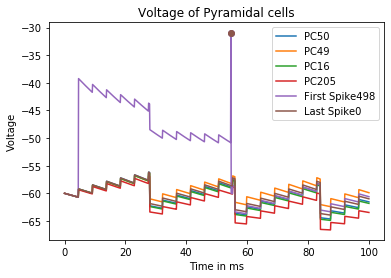

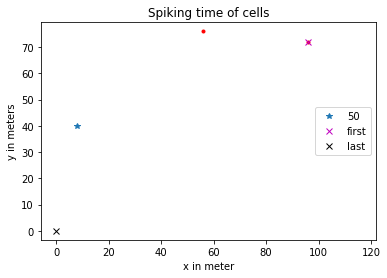

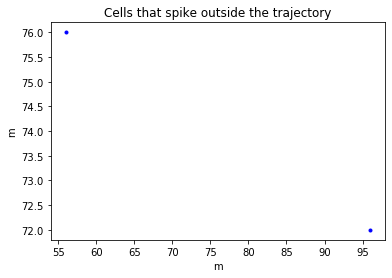

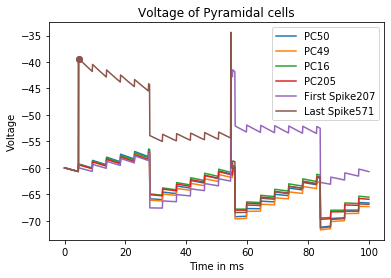

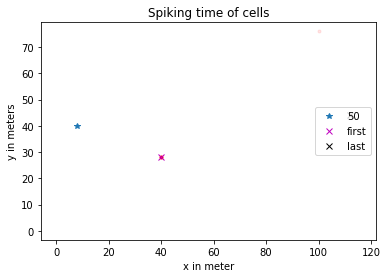

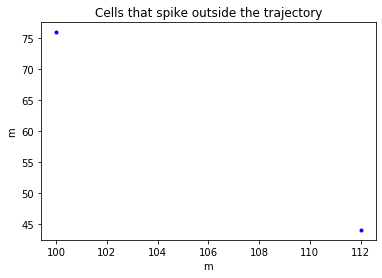

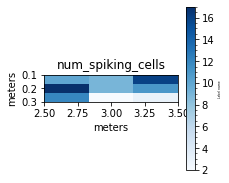

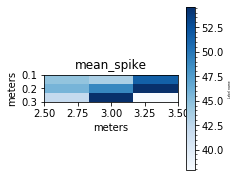

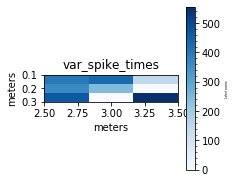

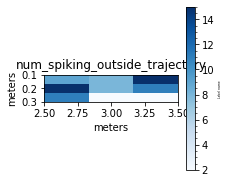

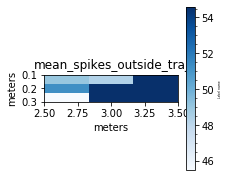

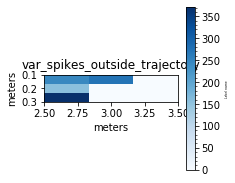

In [207]:
functions.explore_hyperparameters(my_dict=my_dict, step=step, n=n, model="ThresholdModel", trajectory=trajectory)